# Index:

    1) Data Reading/Understanding
    2) Data Cleaning & Handling Missing data or Missing Value Imputation
    3) Outlier Detection
    4) Derived Columns
    5) EDA
    6) Data Preparation
        1) Split into Train & Test
        2) Standarizing      
    7) Data Modeling & Evaluation
        1) Logistic Regression
        2) Decision Tree
        3) Random Forest
        4) ADA Boost
        5) XGBoost
    8) Model Evaluation For Feature Importance

In [1]:
import pandas as pd
import numpy as np


### Sklearn Packages
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

# 1) Data Reading & Understanding

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### We can see that there are many features with null values in it, we would have to treat those null values
### In Total we have 891 passenger details

### Let's look at the survival ratio

In [7]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
labels = train_data.Survived.value_counts()
labels.index=['Not-Survived', 'Survived']
labels

Not-Survived    549
Survived        342
Name: Survived, dtype: int64

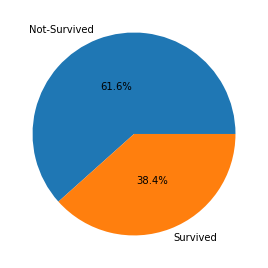

In [9]:
fig = plt.figure(figsize=[10, 6])
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])

ax0.pie(labels, labels=labels.index, pctdistance=0.5, autopct='%.1f%%')

plt.show()

### We can see that in the train dataset we have 38.4% passengers who have survived out of 891 pasengers

### Here we have a balanced dataset

# 2) Data Cleaning & Handling Missing Values

## Train & Test Dataset

In [10]:
round(train_data.isnull().sum()/len(train_data.index)*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [11]:
round(test_data.isnull().sum()/len(test_data.index)*100,2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

## Age

In [12]:
train_data.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [13]:
train_data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## Let's impute Median Age in place of null values

In [14]:
train_data.Age.fillna('28',inplace = True,axis = 0)

In [15]:
test_data.Age.fillna('28',inplace = True,axis = 0)

In [16]:
round(train_data.isnull().sum()/len(train_data.index)*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

## Cabin

In [17]:
train_data.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
E101           3
              ..
D47            1
E46            1
D28            1
C95            1
C128           1
Name: Cabin, Length: 147, dtype: int64

In [18]:
train_data[train_data.Cabin == 'C23 C25 C27']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263.0,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23,3,2,19950,263.0,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24,3,2,19950,263.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64,1,4,19950,263.0,C23 C25 C27,S


## As we have 77% of cabin data missing, and also the ones which has data is not stored properly, let's drop the column

In [19]:
train_data.drop(columns = 'Cabin',inplace = True,axis = 1)
test_data.drop(columns = 'Cabin',inplace = True,axis = 1)

In [20]:
round(train_data.isnull().sum()/len(train_data.index)*100,2)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Embarked       0.22
dtype: float64

## Embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [21]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Imputing the Mode(Most common port of embarkment) i.e. S= Southampton

In [22]:
train_data.Embarked.fillna('S',inplace = True,axis = 0)

In [23]:
train_data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

## Ticket

In [24]:
train_data.Ticket.value_counts()

347082      7
1601        7
CA. 2343    7
CA 2144     6
3101295     6
           ..
3411        1
2624        1
PC 17476    1
349212      1
34218       1
Name: Ticket, Length: 681, dtype: int64

## Here ticket number does not give any extra information about the passenger, so let's drop the column

In [25]:
train_data.drop(columns = 'Ticket',inplace = True,axis = 1)
test_data.drop(columns = 'Ticket',inplace = True,axis = 1)

In [26]:
round(train_data.isnull().sum()/len(train_data.index)*100,2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [27]:
round(test_data.isnull().sum()/len(test_data.index)*100,2)

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Fare           0.24
Embarked       0.00
dtype: float64

## Fare

In [28]:
test_data.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

## Let's impute median value in Null values in fare Column

In [29]:
test_data.Fare.median()

14.4542

In [30]:
test_data.Fare.fillna(test_data.Fare.median(),inplace = True)

In [31]:
round(test_data.isnull().sum()/len(test_data.index)*100,2)

PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64

## We can also remove Unique Id Columns like PassengerID and Name which does not helps in predicting 


In [32]:
train_data.drop(columns = ['PassengerId','Name'],inplace = True,axis = 1)
test_data.drop(columns = ['PassengerId','Name'],inplace = True,axis = 1)

In [33]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47,1,0,7.0000,S
2,2,male,62,0,0,9.6875,Q
3,3,male,27,0,0,8.6625,S
4,3,female,22,1,1,12.2875,S


## Now we have a cleaned Train & Test dataset with no null values in the observations

# 3) Derived Column

### We can create derived columns by combing SibSp+Parch = Family Count and then remove the original 2 columns

In [34]:
train_data['Family_Count'] = train_data.SibSp+train_data.Parch
test_data['Family_Count'] = test_data.SibSp+train_data.Parch

In [35]:
## Dropping the Orignial SibSP & Parch Columns

train_data.drop(columns = ['SibSp','Parch'],inplace = True, axis = 1)
test_data.drop(columns = ['SibSp','Parch'],inplace = True, axis = 1)

### We also can create an IsAlone column to identify passengers who were travelling alone in Titanic

In [36]:
train_data['IsAlone'] = train_data.Family_Count.apply(lambda x: 1 if x == 0 else 0)
test_data['IsAlone'] = test_data.Family_Count.apply(lambda x: 1 if x == 0 else 0)

In [37]:
train_data['IsAlone'].value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

### Creating a Age Group Column to categorize passengers into Teens, Adults, Senior Citizens

In [38]:
train_data.Age = train_data.Age.astype('float64')
test_data.Age = test_data.Age.astype('float64')

In [39]:
def cat_age(val):
    if val > 0 and val <= 12:
        return 'Child'
    elif val >= 13 and val<= 17:
        return 'Teen'
    elif val > 18 and val <= 59:
        return 'Adult'
    elif val >= 60:
        return 'Senior Citizen'

train_data['Age_Group'] = train_data.Age.apply(lambda x : cat_age(x))
test_data['Age_Group'] = test_data.Age.apply(lambda x : cat_age(x))

In [40]:
train_data.Age_Group.value_counts()

Adult             726
Child              69
Teen               44
Senior Citizen     26
Name: Age_Group, dtype: int64

In [41]:
test_data.Age_Group.value_counts()

Adult             350
Child              25
Teen               16
Senior Citizen     14
Name: Age_Group, dtype: int64

### As we have Age_Group column which is a categorized column, we can remove Age column from the dataset

In [42]:
train_data.drop(columns = 'Age',inplace = True,axis = 1)
test_data.drop(columns = 'Age',inplace = True,axis = 1)

# 5) EDA

In [43]:
survived_data = train_data[train_data.Survived == 1]
not_survived_data = train_data[train_data.Survived == 0]

## Univariate Analysis

In [44]:
def PiePlotCatVar(var,Ordered=True, ascending=True):
    fig, axarr = plt.subplots(2,2, figsize=(12, 12))
    
    survived_counts=survived_data[var].value_counts()
    not_survived_count=not_survived_data[var].value_counts()
    if Ordered:
        survived_counts=survived_counts.sort_index(ascending=ascending)
        not_survived_count=not_survived_count.sort_index(ascending=ascending)
    else:
        fully_paied_counts=fully_paied_counts.sort_values(ascending=ascending)
        not_survived_count=not_survived_count.sort_values(ascending=ascending)
    
    wedges, texts =axarr[0][0].pie(survived_counts,labels= round(survived_counts/survived_counts.sum()*100,2).apply(lambda x:str(x)+"%"))
    axarr[0][0].legend(wedges, survived_counts.index,
          title=str(var),
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    
    sns.countplot(survived_data[var], ax=axarr[1][0], order=survived_counts.index)
    
    axarr[0][0].set_title("Survived Passengers("+str(var)+")", fontsize=18)
    
    
    
    wedges, texts = axarr[0][1].pie(not_survived_count,labels= round(not_survived_count/not_survived_count.sum()*100,2).apply(lambda x:str(x)+"%"))
    
    axarr[0][1].legend(wedges, not_survived_count.index,
          title=str(var),
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    
    sns.countplot(not_survived_data[var].sort_index(ascending=ascending),ax=axarr[1][1], order = not_survived_count.index)
    
    axarr[0][1].set_title("Not-Survived Passengers("+str(var)+")", fontsize=18)
    
    fig.tight_layout()
    plt.show()
    
    print('#'*50)
    print('Below is the Surival Rate for each group in '+ str(var) + ' Feature \n')
    print(round(train_data.groupby(by = var).mean()['Survived']*100,2))

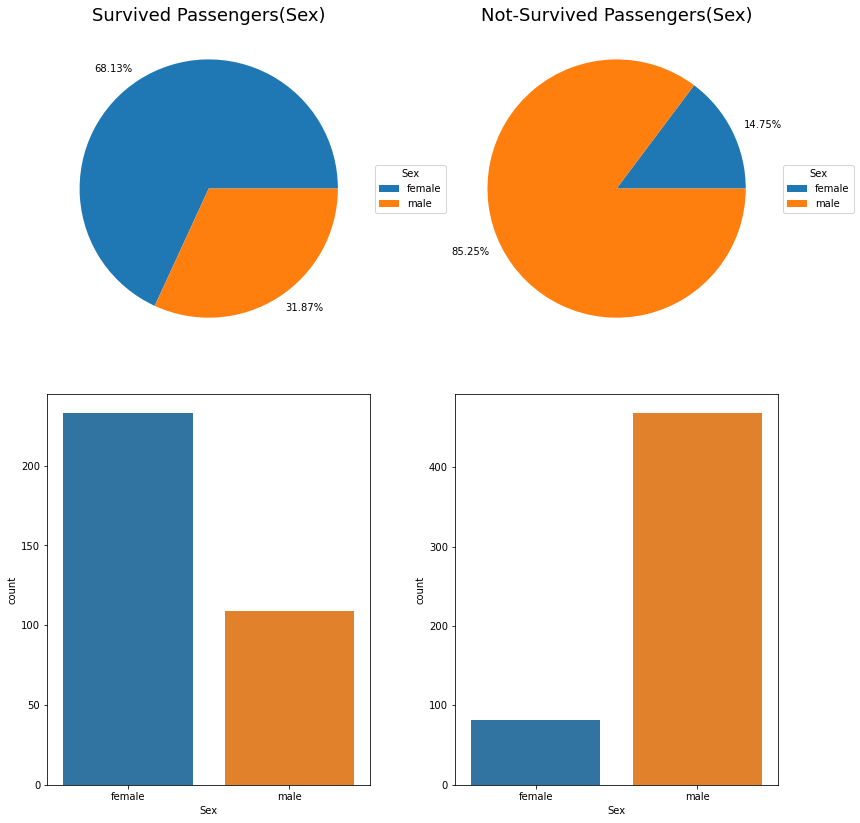

##################################################
Below is the Surival Rate for each group in Sex Feature 

Sex
female    74.20
male      18.89
Name: Survived, dtype: float64


In [45]:
PiePlotCatVar('Sex')

# Observation:

    > The Rate of Survival in Female is higher than Male

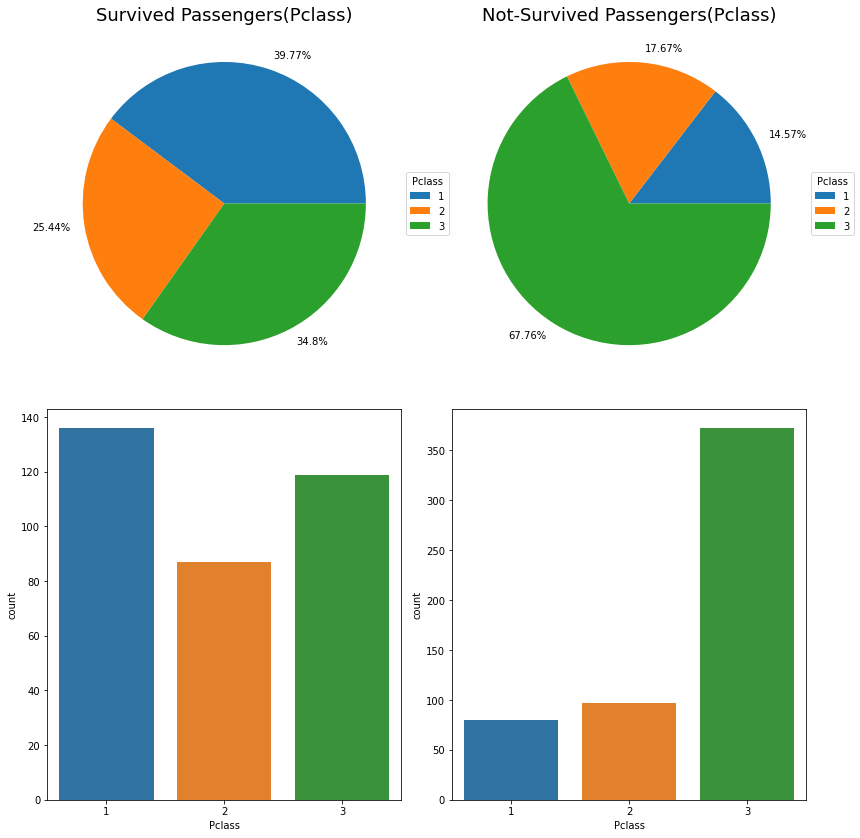

##################################################
Below is the Surival Rate for each group in Pclass Feature 

Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64


In [46]:
PiePlotCatVar('Pclass')

# Observation:

    > Looking at the above results we can see that rate of survial in 1st Class higher
    > Rate of death in 3rd class is higher

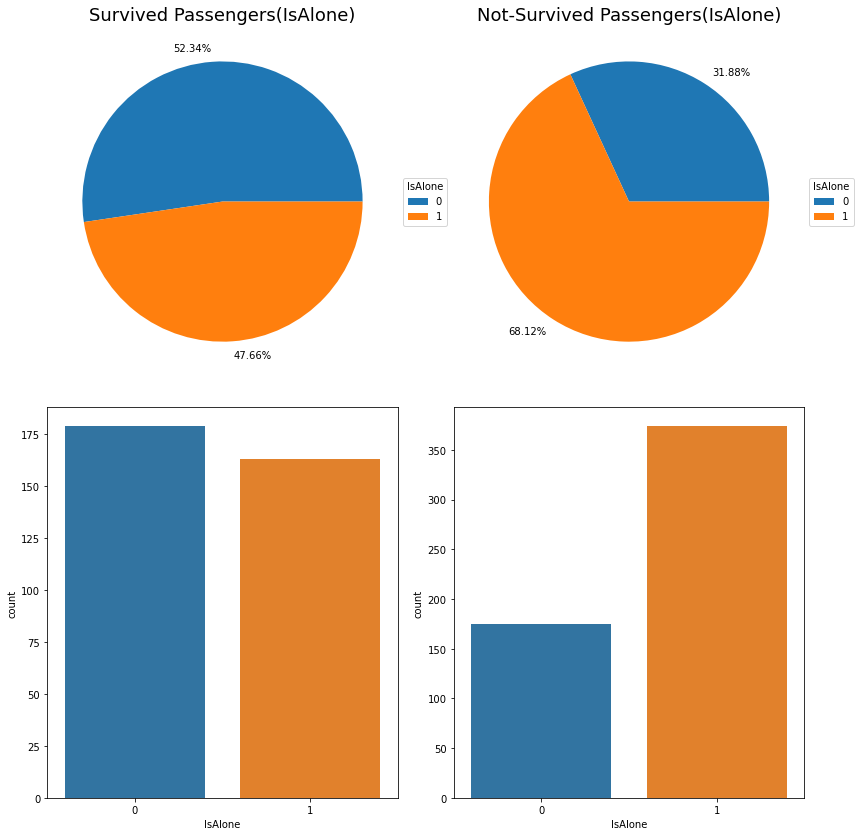

##################################################
Below is the Surival Rate for each group in IsAlone Feature 

IsAlone
0    50.56
1    30.35
Name: Survived, dtype: float64


In [47]:
PiePlotCatVar('IsAlone')

# Observation:

    > Here we can see that passengers who were Not Alone in the Ship has higher Survival Rate

# Bivariate Analysis

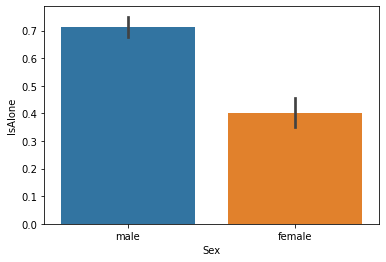

##################################################


Sex
female    314
male      577
Name: IsAlone, dtype: int64

In [48]:
sns.barplot(x = train_data.Sex,y = train_data.IsAlone)
plt.show()

print('#'*50)

train_data.groupby(by = 'Sex').count()['IsAlone']

# Observation:
    > Looking at the above results we can figure out that Ratio of Male passengers being Alone in the Titanic is higher

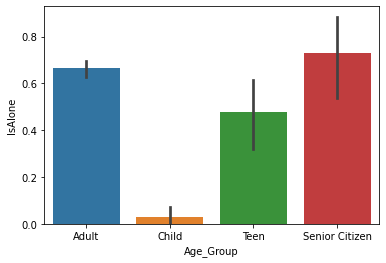

##################################################


Age_Group       Survived
Adult           0           336
                1           146
Child           0             1
                1             1
Senior Citizen  0            15
                1             4
Teen            0            12
                1             9
Name: IsAlone, dtype: int64

In [49]:
sns.barplot(x = train_data.Age_Group,y = train_data.IsAlone)
plt.show()

print('#'*50)

train_data[train_data.IsAlone == 1].groupby(by = ['Age_Group','Survived']).count()['IsAlone']

# Observation:

    > Here we can observe that Adult who were Alone Survived the most
    > 2 Children who were Alone in the Ship of Age 11(Male) & 5(Female), unfortunately only 5 year old Female Survived
    > 15 Senior Citizen, couldn't survive the Titanic, this may be due to sudden stampede happening after the Ship started Sinking
    > 12 Teen also couldn't survive the Titanic

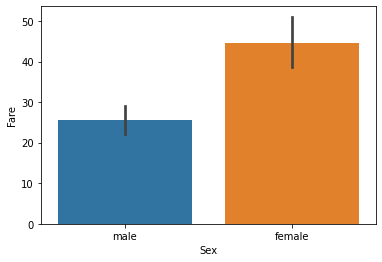

##################################################


Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [50]:
sns.barplot(x = train_data.Sex,y = train_data.Fare)
plt.show()

print('#'*50)

train_data.groupby(by = 'Sex').mean()['Fare']

# Observation:
    > Here we can observe that Female has paid Higher Average Fare for the trip in Titanic then Men

In [51]:
train_data.groupby(by = ['Embarked','Sex']).count()['Survived']

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    205
          male      441
Name: Survived, dtype: int64

# Observation:
    > Here we can observe that Survival of Males from the Port of Southampton is the highest than any other port

In [52]:
train_data.groupby(by = ['Age_Group','Sex']).count()['Survived']

Age_Group       Sex   
Adult           female    242
                male      484
Child           female     32
                male       37
Senior Citizen  female      4
                male       22
Teen            female     23
                male       21
Name: Survived, dtype: int64

# Observation:
    > We can observe that Male Adult has the highest number of Survivals, follwed by Adult Females
    > Sadly we can also see that Senior Citizen Surival is the least among all age groups

# 6) Data Preparation

# 6.1) Create Dummy Variables

In [53]:
train_data.head()

,Survived,Pclass,Sex,Fare,Embarked,Family_Count,IsAlone,Age_Group
0,0,3,male,7.2500,S,1,0,Adult
1,1,1,female,71.2833,C,1,0,Adult
2,1,3,female,7.9250,S,0,1,Adult
3,1,1,female,53.1000,S,1,0,Adult
4,0,3,male,8.0500,S,0,1,Adult


In [54]:
columns = ['Pclass','Sex','Embarked','Age_Group']

In [55]:
for i in columns:
    temp = pd.get_dummies(train_data[i], drop_first = True, prefix=i)
    train_data = pd.concat([train_data, temp], axis = 1)
    train_data.drop([i], axis = 1, inplace = True)

In [56]:
## Copying same dummy variables in Test Data

for i in columns:
    temp = pd.get_dummies(test_data[i], drop_first = True, prefix=i)
    test_data = pd.concat([test_data, temp], axis = 1)
    test_data.drop([i], axis = 1, inplace = True)

In [57]:
train_data.head()

,Survived,Fare,Family_Count,IsAlone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Age_Group_Child,Age_Group_Senior Citizen,Age_Group_Teen
0,0,7.2500,1,0,0,1,1,0,1,0,0,0
1,1,71.2833,1,0,0,0,0,0,0,0,0,0
2,1,7.9250,0,1,0,1,0,0,1,0,0,0
3,1,53.1000,1,0,0,0,0,0,1,0,0,0
4,0,8.0500,0,1,0,1,1,0,1,0,0,0


In [58]:
test_data.head()

,Fare,Family_Count,IsAlone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Age_Group_Child,Age_Group_Senior Citizen,Age_Group_Teen
0,7.8292,0.0,1,0,1,1,1,0,0,0,0
1,7.0000,1.0,0,0,1,0,0,1,0,0,0
2,9.6875,0.0,1,1,0,1,1,0,0,1,0
3,8.6625,0.0,1,0,1,1,0,1,0,0,0
4,12.2875,1.0,0,0,1,0,0,1,0,0,0


# 6.2) Min-Max Scaler

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaled_cols = ['Fare','Family_Count']

In [61]:
train_data[scaled_cols]

,Fare,Family_Count
0,7.2500,1
1,71.2833,1
2,7.9250,0
3,53.1000,1
4,8.0500,0
...,...,...
886,13.0000,0
887,30.0000,0
888,23.4500,3
889,30.0000,0


In [62]:
scaler = MinMaxScaler()

train_data[scaled_cols] = scaler.fit_transform(train_data[scaled_cols])

train_data.head()

,Survived,Fare,Family_Count,IsAlone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Age_Group_Child,Age_Group_Senior Citizen,Age_Group_Teen
0,0,0.014151,0.1,0,0,1,1,0,1,0,0,0
1,1,0.139136,0.1,0,0,0,0,0,0,0,0,0
2,1,0.015469,0.0,1,0,1,0,0,1,0,0,0
3,1,0.103644,0.1,0,0,0,0,0,1,0,0,0
4,0,0.015713,0.0,1,0,1,1,0,1,0,0,0


In [63]:
scaler = MinMaxScaler()

test_data[scaled_cols] = scaler.fit_transform(test_data[scaled_cols])

test_data.head()

,Fare,Family_Count,IsAlone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Age_Group_Child,Age_Group_Senior Citizen,Age_Group_Teen
0,0.015282,0.000000,1,0,1,1,1,0,0,0,0
1,0.013663,0.083333,0,0,1,0,0,1,0,0,0
2,0.018909,0.000000,1,1,0,1,1,0,0,1,0
3,0.016908,0.000000,1,0,1,1,0,1,0,0,0
4,0.023984,0.083333,0,0,1,0,0,1,0,0,0


# 6.3) Splitting Train Dataset into Training and Validation dataset

In [64]:
y = train_data['Survived']
X = train_data.drop(columns = 'Survived')

In [65]:
X_train,X_train_valid,y_train,y_train_valid = train_test_split(X,y,train_size = .80,random_state = 100)

In [66]:
print('X_train:: '+str(X_train.shape))
print('y_train:: '+str(y_train.shape))
print('X_train_valid:: '+str(X_train_valid.shape))
print('y_train_valid:: '+str(y_train_valid.shape))

X_train:: (712, 11)
y_train:: (712,)
X_train_valid:: (179, 11)
y_train_valid:: (179,)


### Creating a new Dataframe X_test for storing the Unseen Data

In [67]:
X_test = test_data

In [68]:
X_test

,Fare,Family_Count,IsAlone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Age_Group_Child,Age_Group_Senior Citizen,Age_Group_Teen
0,0.015282,0.000000,1,0,1,1,1,0,0,0,0
1,0.013663,0.083333,0,0,1,0,0,1,0,0,0
2,0.018909,0.000000,1,1,0,1,1,0,0,1,0
3,0.016908,0.000000,1,0,1,1,0,1,0,0,0
4,0.023984,0.083333,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
413,0.015713,0.000000,1,0,1,1,0,1,0,0,0
414,0.212559,0.000000,1,0,0,0,0,0,0,0,0
415,0.014151,0.000000,1,0,1,1,0,1,0,0,0
416,0.015713,0.083333,0,0,1,1,0,1,0,0,0


# 7) Classification Models

In [69]:
df_model_summary = pd.DataFrame(columns = ['Algorithm','Dataset Type','HPT','Accuracy(%)'])

In [70]:
def modelEvaluation(algo,dataset_type,hpt,y_actual,y_predicted):
    #Let's check the overall Metrics
    from sklearn import metrics
    confusion = metrics.confusion_matrix( y_actual, y_predicted )
    tn, fp, fn, tp = metrics.confusion_matrix( y_actual, y_predicted ).ravel()
    specificity = tn / (tn+fp)    
    print('Below is the Confusion Matrix:')
    print(confusion)
    
    metrics = {'Algorithm'      : algo,
               'Dataset Type'   : dataset_type,
               'HPT'            : hpt,
               'Accuracy(%)'    : round(metrics.accuracy_score(y_actual, y_predicted)*100,2)
              }
    return metrics

In [71]:
def modelEvalnSummary(model,x_train,y_train,x_train_valid,y_train_valid,tuning_params=None):
    # extracting name from class name
    name=str(type(model)).split('.')[-1].strip(">,'")
    
    # creating a blank dataframe for holding summary
    df=pd.DataFrame({'Algorithm'      : [],
               'Dataset Type'   : [],
               'HPT'            : [],
               'Accuracy(%)'    : []
              })
    
    # training Default Model 
    model.fit(x_train, y_train)
    # evaluating train Prediction
    y_train_pred = model.predict(x_train)
    print("Evaluating Train set without tuning")
    metrics= modelEvaluation(name,'Train','No',y_train,y_train_pred)
    df=df.append(metrics, ignore_index = True)


    # evaluating test Prediction
    y_train_valid_pred = model.predict(x_train_valid)
    print("Evaluating Train Valid set without tuning")
    metrics= modelEvaluation(name,'Train Valid','No',y_train_valid,y_train_valid_pred)
    df=df.append(metrics, ignore_index = True)
        
    # Hyper Parameter Tuning
    if(tuning_params is not None):
        grid_search = GridSearchCV(estimator=model, param_grid=tuning_params, 
                              cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

        # training With GridsearchCV 
        grid_search.fit(x_train,y_train)

        print(grid_search.best_params_)
        
        #Re running algorithm with best Params
        dt_best = grid_search.best_estimator_

        # evaluating train Prediction
        y_train_pred = dt_best.predict(x_train)
        print("Evaluating train set with tuning")
        metrics= modelEvaluation(name,'Train','Yes',y_train,y_train_pred)
        df=df.append(metrics, ignore_index = True)

        # evaluating test Prediction
        y_train_valid_pred = dt_best.predict(x_train_valid)
        print("Evaluating Train Valid with tuning")
        metrics= modelEvaluation(name,'Train Valid','Yes',y_train_valid,y_train_valid_pred)
        df=df.append(metrics, ignore_index = True)
    return (df)
    

# 7.1) Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr_model = LogisticRegression(random_state = 100)

## Fitting Logistic Regression Model on Training dataset

In [74]:
lr_model.fit(X_train,y_train)

LogisticRegression(random_state=100)

In [75]:
y_train_pred = lr_model.predict(X_train)
y_train_pred_proba = lr_model.predict_proba(X_train)

In [76]:
summary=modelEvalnSummary(
    lr_model,
    X_train, 
    y_train,
    X_train_valid,
    y_train_valid
)
summary

Evaluating Train set without tuning
Below is the Confusion Matrix:
[[394  51]
 [ 77 190]]
Evaluating Train Valid set without tuning
Below is the Confusion Matrix:
[[90 14]
 [22 53]]


,Algorithm,Dataset Type,HPT,Accuracy(%)
0,LogisticRegression,Train,No,82.02
1,LogisticRegression,Train Valid,No,79.89


In [77]:
df_model_summary=df_model_summary.append(summary,ignore_index = True)
df_model_summary

,Algorithm,Dataset Type,HPT,Accuracy(%)
0,LogisticRegression,Train,No,82.02
1,LogisticRegression,Train Valid,No,79.89


## Hyperparameter Tunning Using RidgeClassifer

In [78]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_clsf = RidgeClassifier()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge_clsf, 
                        param_grid = params, 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, verbose=1)

In [79]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [80]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 2.0
ridge = RidgeClassifier(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[[ 0.42776628 -1.16967338 -0.19154926 -0.19660488 -0.56343631 -0.98880155
  -0.02106614 -0.1236666   0.63886402 -0.2337381   0.16520963]]


In [81]:
y_pred_train = ridge.predict(X_train)
y_pred_train_valid = ridge.predict(X_train_valid)

In [82]:
accuracy_train_lr = accuracy_score(y_train, y_pred_train)
accuracy_train_lr = accuracy_train_lr*100

print(accuracy_train_lr)

81.74157303370787


In [83]:
summary  = ['LogisticRegression','Train','Yes',accuracy_train_lr]
summary

['LogisticRegression', 'Train', 'Yes', 81.74157303370787]

In [84]:
df_model_summary.loc[2] = summary
df_model_summary

,Algorithm,Dataset Type,HPT,Accuracy(%)
0,LogisticRegression,Train,No,82.020000
1,LogisticRegression,Train Valid,No,79.890000
2,LogisticRegression,Train,Yes,81.741573


In [85]:
accuracy_train_valid_lr = accuracy_score(y_train_valid, y_pred_train_valid)
accuracy_train_valid_lr = accuracy_train_valid_lr *100
print(accuracy_train_valid_lr)

80.44692737430168


In [86]:
summary_valid  = ['LogisticRegression','Train Valid','Yes',accuracy_train_valid_lr]
summary_valid

['LogisticRegression', 'Train Valid', 'Yes', 80.44692737430168]

In [87]:
df_model_summary.loc[3] = summary_valid
df_model_summary

,Algorithm,Dataset Type,HPT,Accuracy(%)
0,LogisticRegression,Train,No,82.020000
1,LogisticRegression,Train Valid,No,79.890000
2,LogisticRegression,Train,Yes,81.741573
3,LogisticRegression,Train Valid,Yes,80.446927


# 7.2) Decision Tree With & Without Hyperparameter Tunning

In [88]:
dt_model = DecisionTreeClassifier(random_state = 100)

In [89]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [10,20,30,40,50,60,70,80,90,100],
    'min_samples_leaf': [10, 15,20,25,30,40],
    'criterion': ["gini", "entropy"]
}

In [90]:
summary=modelEvalnSummary(
    dt_model,
    X_train, 
    y_train,
    X_train_valid,
    y_train_valid,
    params
)
summary

Evaluating Train set without tuning
Below is the Confusion Matrix:
[[433  12]
 [ 36 231]]
Evaluating Train Valid set without tuning
Below is the Confusion Matrix:
[[92 12]
 [20 55]]
Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.6s


{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10}
Evaluating train set with tuning
Below is the Confusion Matrix:
[[414  31]
 [ 74 193]]
Evaluating Train Valid with tuning
Below is the Confusion Matrix:
[[97  7]
 [22 53]]


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    6.4s finished


,Algorithm,Dataset Type,HPT,Accuracy(%)
0,DecisionTreeClassifier,Train,No,93.26
1,DecisionTreeClassifier,Train Valid,No,82.12
2,DecisionTreeClassifier,Train,Yes,85.25
3,DecisionTreeClassifier,Train Valid,Yes,83.80


In [91]:
df_model_summary=df_model_summary.append(summary,ignore_index = True)
df_model_summary

,Algorithm,Dataset Type,HPT,Accuracy(%)
0,LogisticRegression,Train,No,82.020000
1,LogisticRegression,Train Valid,No,79.890000
2,LogisticRegression,Train,Yes,81.741573
3,LogisticRegression,Train Valid,Yes,80.446927
4,DecisionTreeClassifier,Train,No,93.260000
5,DecisionTreeClassifier,Train Valid,No,82.120000
6,DecisionTreeClassifier,Train,Yes,85.250000
7,DecisionTreeClassifier,Train Valid,Yes,83.800000


# 7.3) Random Forest

In [92]:
rf_model = RandomForestClassifier(random_state = 100)

In [93]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5,10,15,20,30,40],
    'min_samples_leaf': [10,15,20,25,30,50],
    'max_features': [2,4,5,6,7,8],
    'n_estimators': [10,15,20,30,40,50,60]
}

In [94]:
summary=modelEvalnSummary(
    rf_model,
    X_train, 
    y_train,
    X_train_valid,
    y_train_valid,
    params
)
summary

Evaluating Train set without tuning
Below is the Confusion Matrix:
[[428  17]
 [ 31 236]]
Evaluating Train Valid set without tuning
Below is the Confusion Matrix:
[[91 13]
 [15 60]]
Fitting 4 folds for each of 1512 candidates, totalling 6048 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3576 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4876 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 6048 out of 6048 | elapsed:  4.1min finished


{'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 10, 'n_estimators': 50}
Evaluating train set with tuning
Below is the Confusion Matrix:
[[420  25]
 [ 90 177]]
Evaluating Train Valid with tuning
Below is the Confusion Matrix:
[[97  7]
 [27 48]]


,Algorithm,Dataset Type,HPT,Accuracy(%)
0,RandomForestClassifier,Train,No,93.26
1,RandomForestClassifier,Train Valid,No,84.36
2,RandomForestClassifier,Train,Yes,83.85
3,RandomForestClassifier,Train Valid,Yes,81.01


In [95]:
df_model_summary=df_model_summary.append(summary,ignore_index = True)
df_model_summary

,Algorithm,Dataset Type,HPT,Accuracy(%)
0,LogisticRegression,Train,No,82.020000
1,LogisticRegression,Train Valid,No,79.890000
2,LogisticRegression,Train,Yes,81.741573
3,LogisticRegression,Train Valid,Yes,80.446927
4,DecisionTreeClassifier,Train,No,93.260000
5,DecisionTreeClassifier,Train Valid,No,82.120000
6,DecisionTreeClassifier,Train,Yes,85.250000
7,DecisionTreeClassifier,Train Valid,Yes,83.800000
8,RandomForestClassifier,Train,No,93.260000
9,RandomForestClassifier,Train Valid,No,84.360000


In [96]:
import pandas as pd
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [97]:
feature_importances.sort_values(by = 'importance',ascending = False)

,importance
Fare,0.388386
Sex_male,0.296057
Family_Count,0.084761
Pclass_3,0.080404
Age_Group_Child,0.046130
Embarked_S,0.026251
Pclass_2,0.019761
IsAlone,0.018516
Age_Group_Senior Citizen,0.015487
Age_Group_Teen,0.012991


# 7.4) ADA Boost

In [98]:
ada_boost_model = AdaBoostClassifier(random_state = 100)

In [99]:
# Create the parameter grid based on the results of random search 

params = {
    'n_estimators':[10,20,30,40,50,60], 
    'base_estimator':[
        None,
        LogisticRegression()
    ],
    'learning_rate':[0.001,0.01,0.1]
}

In [100]:
summary=modelEvalnSummary(
    ada_boost_model,
    X_train, 
    y_train,
    X_train_valid,
    y_train_valid,
    params
)
summary

Evaluating Train set without tuning
Below is the Confusion Matrix:
[[393  52]
 [ 71 196]]
Evaluating Train Valid set without tuning
Below is the Confusion Matrix:
[[88 16]
 [22 53]]
Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   10.7s finished


{'base_estimator': None, 'learning_rate': 0.1, 'n_estimators': 60}
Evaluating train set with tuning
Below is the Confusion Matrix:
[[399  46]
 [ 86 181]]
Evaluating Train Valid with tuning
Below is the Confusion Matrix:
[[93 11]
 [23 52]]


,Algorithm,Dataset Type,HPT,Accuracy(%)
0,AdaBoostClassifier,Train,No,82.72
1,AdaBoostClassifier,Train Valid,No,78.77
2,AdaBoostClassifier,Train,Yes,81.46
3,AdaBoostClassifier,Train Valid,Yes,81.01


In [101]:
df_model_summary=df_model_summary.append(summary,ignore_index = True)
df_model_summary

,Algorithm,Dataset Type,HPT,Accuracy(%)
0,LogisticRegression,Train,No,82.020000
1,LogisticRegression,Train Valid,No,79.890000
2,LogisticRegression,Train,Yes,81.741573
3,LogisticRegression,Train Valid,Yes,80.446927
4,DecisionTreeClassifier,Train,No,93.260000
5,DecisionTreeClassifier,Train Valid,No,82.120000
6,DecisionTreeClassifier,Train,Yes,85.250000
7,DecisionTreeClassifier,Train Valid,Yes,83.800000
8,RandomForestClassifier,Train,No,93.260000
9,RandomForestClassifier,Train Valid,No,84.360000


# 7.5) XGBoost

In [102]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [103]:
params={
        'n_estimators' : [50,60,70,80,90,100], # no of trees 
        'learning_rate' : [0.0001,0.001,0.01,0.1],  
        'min_child_weight': [5,7,10,15,20],
        'gamma': [0.1,1.5],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6, 1.0],
        'max_depth': [3, 5,10,15]
        }

In [104]:
summary=modelEvalnSummary(
    xgb_cfl,
    X_train, 
    y_train,
    X_train_valid,
    y_train_valid,
    params
)
summary

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:18:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Evaluating Train set without tuning
Below is the Confusion Matrix:
[[431  14]
 [ 36 231]]
Evaluating Train Valid set without tuning
Below is the Confusion Matrix:
[[91 13]
 [19 56]]
Fitting 4 folds for each of 3840 candidates, totalling 15360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3772 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 5472 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 7372 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 9110 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 10260 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 11510 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 12860 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 14310 tasks    

[22:34:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 90, 'subsample': 1.0}
Evaluating train set with tuning
Below is the Confusion Matrix:
[[419  26]
 [ 67 200]]
Evaluating Train Valid with tuning
Below is the Confusion Matrix:
[[98  6]
 [21 54]]


,Algorithm,Dataset Type,HPT,Accuracy(%)
0,XGBClassifier,Train,No,92.98
1,XGBClassifier,Train Valid,No,82.12
2,XGBClassifier,Train,Yes,86.94
3,XGBClassifier,Train Valid,Yes,84.92


In [105]:
df_model_summary=df_model_summary.append(summary,ignore_index = True)
df_model_summary

,Algorithm,Dataset Type,HPT,Accuracy(%)
0,LogisticRegression,Train,No,82.020000
1,LogisticRegression,Train Valid,No,79.890000
2,LogisticRegression,Train,Yes,81.741573
3,LogisticRegression,Train Valid,Yes,80.446927
4,DecisionTreeClassifier,Train,No,93.260000
5,DecisionTreeClassifier,Train Valid,No,82.120000
6,DecisionTreeClassifier,Train,Yes,85.250000
7,DecisionTreeClassifier,Train Valid,Yes,83.800000
8,RandomForestClassifier,Train,No,93.260000
9,RandomForestClassifier,Train Valid,No,84.360000


In [106]:
xgb_cfl.feature_importances_.shape

(11,)

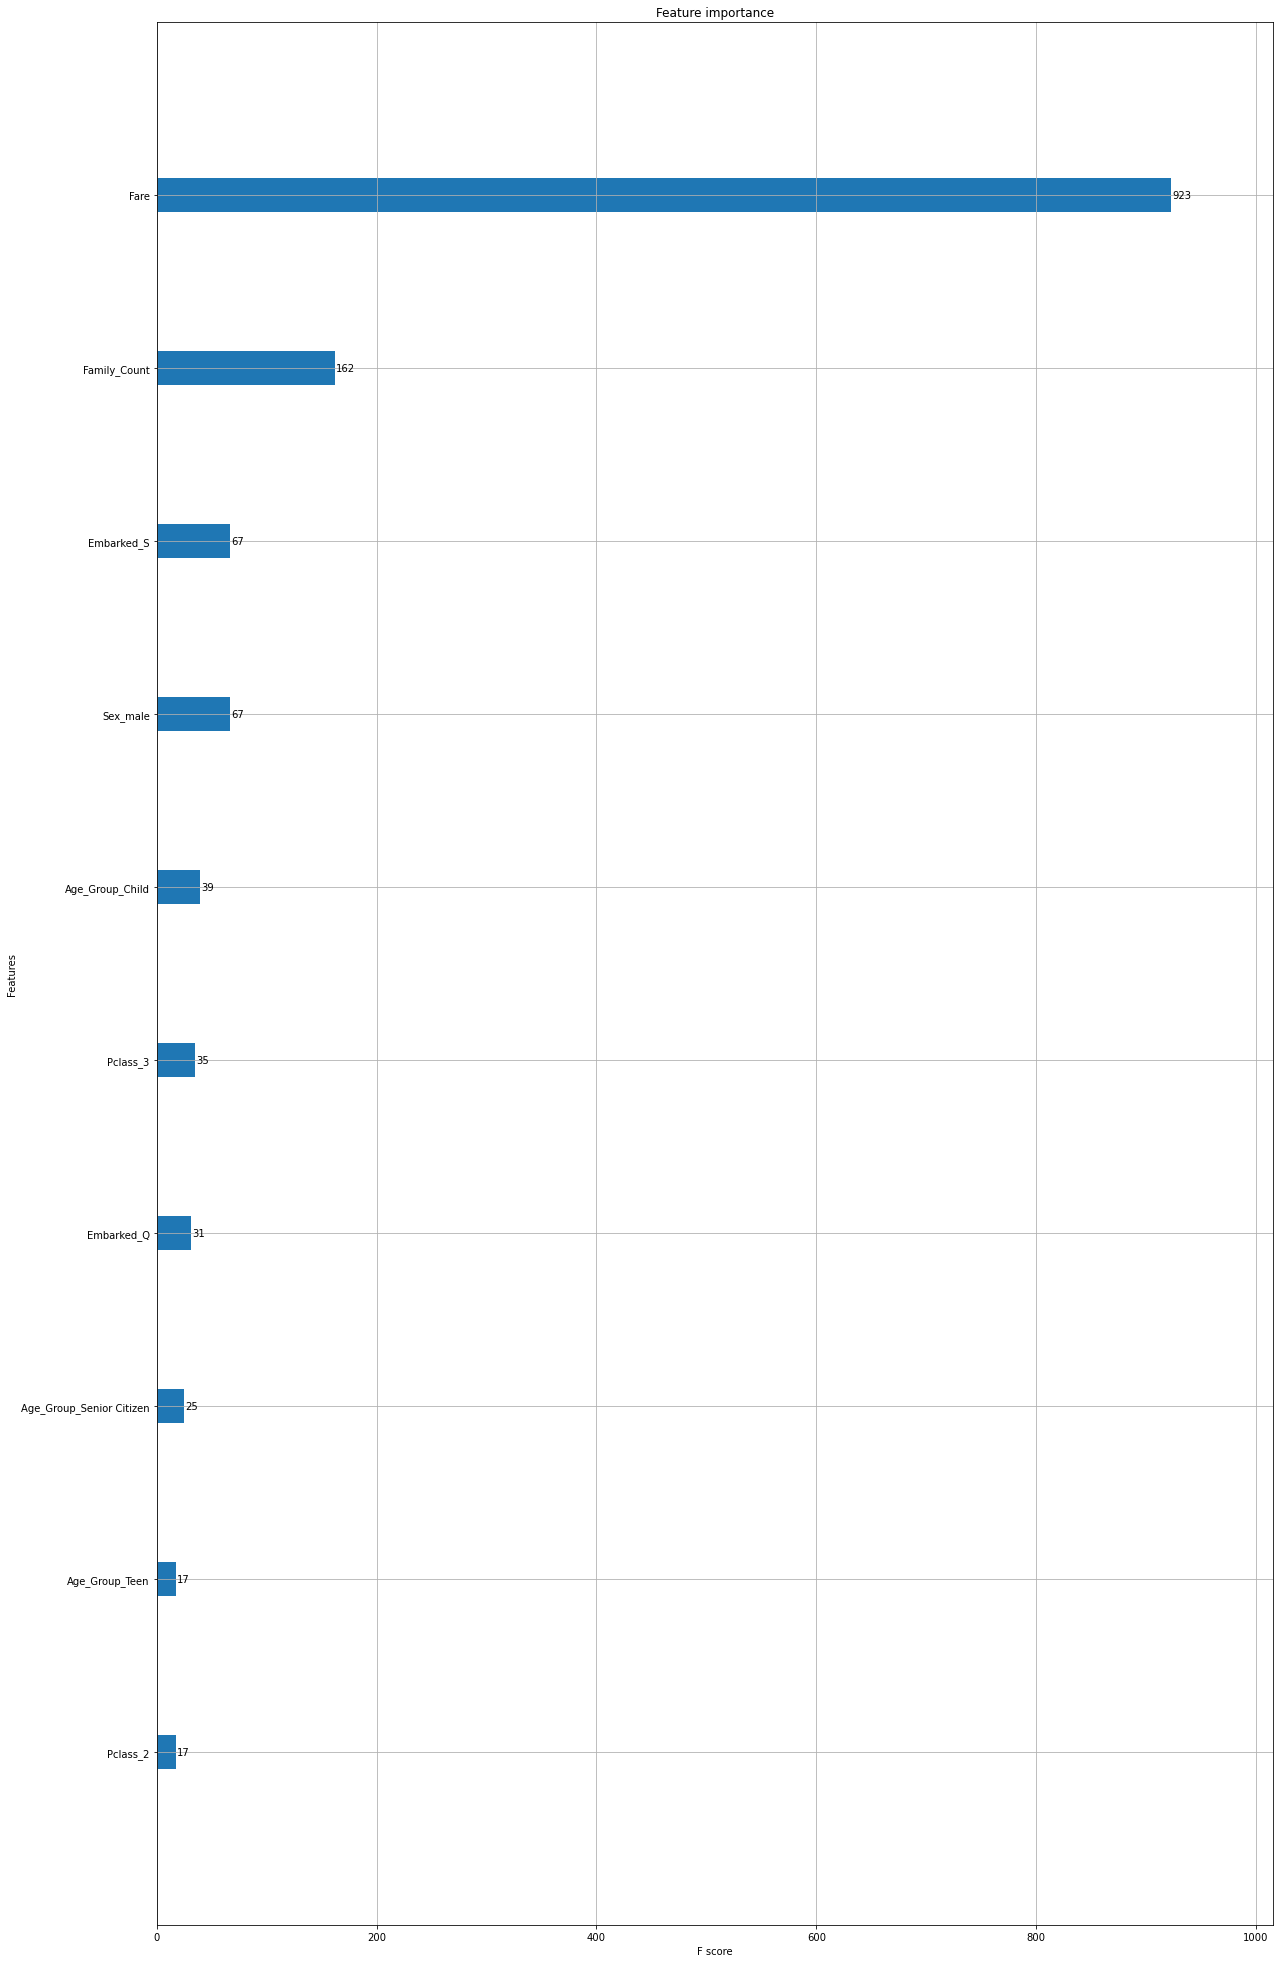

In [107]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 35)
plot_importance(xgb_cfl)

## Applying the best Found parameters from cross validation using XGBoost to predict the Test(Unseen) Dataset

In [109]:
xgboost_best = xgb.XGBClassifier(n_jobs = -1
                                 ,objective = 'binary:logistic'
                                 ,colsample_bytree = 1.0
                                  ,gamma = 0.1
                                  ,learning_rate = 0.1
                                  ,max_depth = 5
                                  ,min_child_weight = 5
                                  ,n_estimators = 90
                                  ,subsample = 1.0)

In [110]:
xgboost_best.fit(X_train,y_train)

[22:34:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=90, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [111]:
y_test_pred = xgboost_best.predict(X_test)

In [112]:
X_test['Survived'] = y_test_pred

In [114]:
X_test.Survived.value_counts()

0    270
1    148
Name: Survived, dtype: int64

## Exporting Final predicted Unseen Dataset into Excel

In [115]:
X_test.to_excel(r'C:\Users\HP\2_Kaggle Practice\Titanic\titanic_prediction.xlsx', index = False)

# Observation:
    > Here we can see that our XGBoost Model with best parameters were able to identify 148 passengers in the unseen dataset as survived

# Summary:

    > After applying multiple Algorithms, we are able to get maximum accuracy with XGBoost Algorithm
    > So we have our Final Model as XGBoost with 86% Accuracy to predict if passenger will survived or not
    > After finding feature importance from XGBoost Model, below are the top 3 features to identify if passenger would survive:
        1) Fare
        2) Family Count
        3) Embarked (Port) and Gender [Both has same Score in feature importance]